#**Inteligencia artificial**
##**Proyecto de unidad I - Junio, 2023**

---



>**Integrantes**
*   Anselmo César Farfan Pajuelo
*   Jean Carlos Escobar Arcaya
*   Johan Marcos Condori Orellana
*   Alvaro Alejandro Rivera Ramirez
*   Romel Nelson Roy Melchor Rosas



---
Librerías del proyecto

In [1]:
import pandas as pd # Para lectura de datos inicial
import numpy as np  # Para manejo de matrices con numpy
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.io import arff # Para lectura de archivo .arff
from sklearn.model_selection import train_test_split  # Para separar los conjunto de datos en evaluación y entrenamiento
from sklearn.metrics import confusion_matrix #Para la matriz de confusión
from keras.models import Sequential # Para el uso de modelos secuenciales
from keras.layers import Dense  # Para establecer capas densas en el modelo

##**Clasificación**

### **Problema a resolver**

Realizar un modelo que clasifique un sitio web en base a 30 atributos como "Sitio de phishing" o "Sitio legítimo"



1.    having_IP_Address  { -1,1 }
2.    URL_Length   { 1,0,-1 }
3.    Shortining_Service { 1,-1 }
4.    having_At_Symbol   { 1,-1 }
5.    double_slash_redirecting { -1,1 }
6.    Prefix_Suffix  { -1,1 }
7.    having_Sub_Domain  { -1,0,1 }
8.    SSLfinal_State  { -1,1,0 }
9.    Domain_registeration_length { -1,1 }
10.    Favicon { 1,-1 }
11.    port { 1,-1 }
12.    HTTPS_token { -1,1 }
13.    Request_URL  { 1,-1 }
14.    URL_of_Anchor { -1,0,1 }
15.    Links_in_tags { 1,-1,0 }
16.    SFH  { -1,1,0 }
17.    Submitting_to_email { -1,1 }
18.    Abnormal_URL { -1,1 }
19.    Redirect  { 0,1 }
20.    on_mouseover  { 1,-1 }
21.    RightClick  { 1,-1 }
22.    popUpWidnow  { 1,-1 }
23.    Iframe { 1,-1 }
24.    age_of_domain  { -1,1 }
25.    DNSRecord   { -1,1 }
26.    web_traffic  { -1,0,1 }
27.    Page_Rank { -1,1 }
28.    Google_Index { 1,-1 }
29.    Links_pointing_to_page { 1,0,-1 }
30.    Statistical_report { -1,1 }
1.    Result  { -1,1 }




> Se utilizara un clasificador binario, 30 neuronas de entrada y 1 de salida

Modelo de clasificación binaria

### **Procedimiento**

> Carga del data set en el espacio de trabajo

In [2]:
data, meta = arff.loadarff('/content/Training Dataset.arff')

df = pd.DataFrame(data)

df = df.applymap(lambda x: int(x.decode('utf-8')))
data = df.values

df

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


> Particionando el data set en sub conjuntos para evaluación y entrenamiento

In [3]:
x = data[:, :-1] # todas las filas, todas las columnas hasta < la última
y = np.array(list(map(lambda x: x if x == 1 else 0, data[:, -1])))

# Separando data set en entrenamiento y evaluación
x_train, x_eval, y_train, y_eval = train_test_split(x, y, test_size=0.2, random_state=42)

#### **Modelo grande (8 -> 4 -> 2 -> 1)**

##### **Elaboración**

> 1. Construyendo el modelo

In [4]:
model_lg = Sequential([
    Dense(8, input_dim=30, activation='relu'),
    Dense(4, activation='relu'),
    Dense(2, activation='relu'),
    Dense(1, activation='sigmoid')
])

> 2. Compilando el modelo

In [5]:
model_lg.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [6]:
history = model_lg.fit(x_train, y_train, validation_data=(x_eval, y_eval), epochs=100, batch_size=256)

Epoch 1/100
35/35 [==============================] - 2s 9ms/step - loss: 0.6923 - accuracy: 0.5303 - val_loss: 0.6902 - val_accuracy: 0.5667
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5543 - val_loss: 0.6699 - val_accuracy: 0.5676
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6474 - accuracy: 0.5543 - val_loss: 0.6215 - val_accuracy: 0.5676
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 0.5973 - accuracy: 0.5543 - val_loss: 0.5686 - val_accuracy: 0.5676
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 0.5425 - accuracy: 0.6468 - val_loss: 0.5151 - val_accuracy: 0.8164
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4896 - accuracy: 0.8448 - val_loss: 0.4653 - val_accuracy: 0.8598
Epoch 7/100
35/35 [==============================] - 0s 4ms/step - loss: 0.4453 - accuracy: 0.8848 - val_loss: 0.4267 - val_accuracy: 0.8946
Epoch 8/100
3

##### **Evaluación**

> 3. Evaluando el modelo

In [7]:
_, accuracy = model_lg.evaluate(x_eval, y_eval)
print("Accuracy: {:.2f}%".format(accuracy * 100))

70/70 [==============================] - 0s 2ms/step - loss: 0.1608 - accuracy: 0.9358
Accuracy: 93.58%


> 4. Gráfico de historial de error

In [8]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

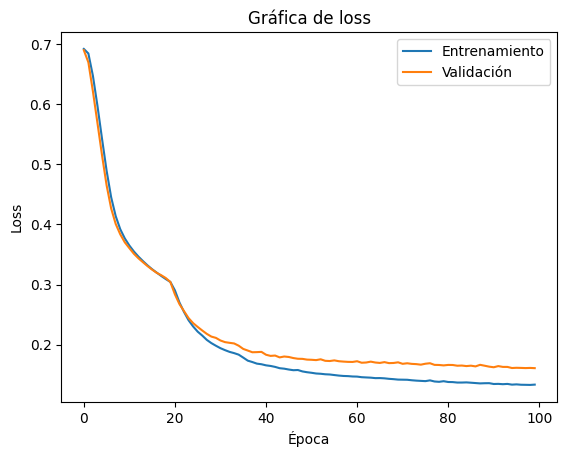

In [9]:
plt.title("Gráfica de loss")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["Entrenamiento", "Validación"], loc="upper right")

> 5. Gráfico de historial de Accuracy

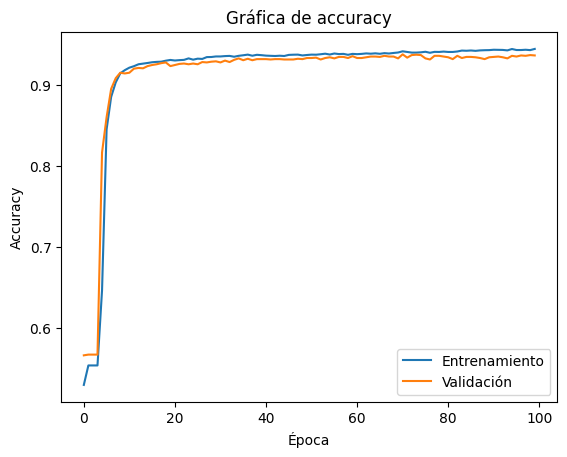

In [10]:
plt.title("Gráfica de accuracy")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["Entrenamiento", "Validación"], loc="lower right")

> 6. Matriz de consistencia

In [11]:
y_pred = model_lg.predict(x_eval)
y_pred = tf.round(y_pred)

matriz_confusion = confusion_matrix(y_eval, y_pred)
print(matriz_confusion)

70/70 [==============================] - 0s 1ms/step
[[ 860   96]
 [  46 1209]]


#### **Modelo mediano (4 -> 2 -> 1)**

##### **Elaboración**

In [12]:
model_md = Sequential([
    Dense(4, input_dim=30, activation='relu'),
    Dense(2, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_md.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

history = model_md.fit(x_train, y_train, validation_data=(x_eval, y_eval), epochs=100, batch_size=128)

Epoch 1/100
70/70 [==============================] - 1s 5ms/step - loss: 0.7743 - accuracy: 0.5737 - val_loss: 0.6789 - val_accuracy: 0.6549
Epoch 2/100
70/70 [==============================] - 0s 3ms/step - loss: 0.6451 - accuracy: 0.6963 - val_loss: 0.6268 - val_accuracy: 0.7417
Epoch 3/100
70/70 [==============================] - 0s 3ms/step - loss: 0.5935 - accuracy: 0.7750 - val_loss: 0.5778 - val_accuracy: 0.8055
Epoch 4/100
70/70 [==============================] - 0s 3ms/step - loss: 0.5401 - accuracy: 0.8363 - val_loss: 0.5230 - val_accuracy: 0.8544
Epoch 5/100
70/70 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.8713 - val_loss: 0.4667 - val_accuracy: 0.8810
Epoch 6/100
70/70 [==============================] - 0s 3ms/step - loss: 0.4386 - accuracy: 0.8970 - val_loss: 0.4312 - val_accuracy: 0.8991
Epoch 7/100
70/70 [==============================] - 0s 3ms/step - loss: 0.4093 - accuracy: 0.9111 - val_loss: 0.4060 - val_accuracy: 0.9055
Epoch 8/100
7

##### **Evaluación**

In [13]:
_, accuracy = model_md.evaluate(x_eval, y_eval)
print("Accuracy: {:.2f}%".format(accuracy * 100))

70/70 [==============================] - 0s 1ms/step - loss: 0.1724 - accuracy: 0.9335
Accuracy: 93.35%


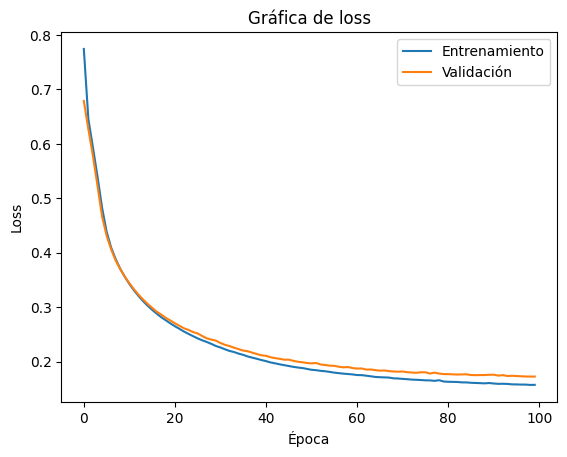

In [14]:
plt.title("Gráfica de loss")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["Entrenamiento", "Validación"], loc="upper right")

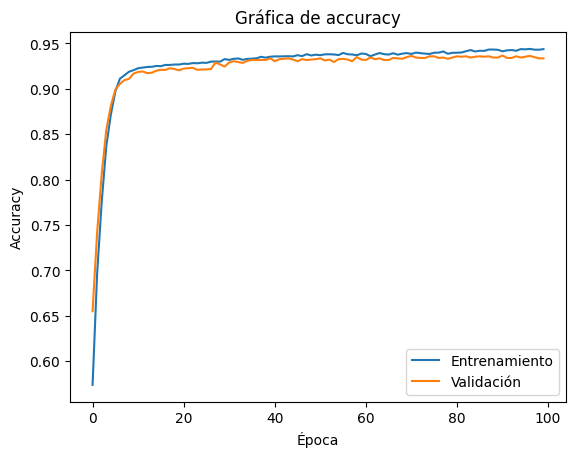

In [15]:
plt.title("Gráfica de accuracy")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["Entrenamiento", "Validación"], loc="lower right")

In [16]:
y_pred = model_md.predict(x_eval)
y_pred = tf.round(y_pred)

matriz_confusion = confusion_matrix(y_eval, y_pred)
print(matriz_confusion)

70/70 [==============================] - 0s 2ms/step
[[ 866   90]
 [  57 1198]]


#### **Modelo pequeño (2 -> 1)**

##### **Elaboración**

In [17]:
model_sm = Sequential([
    Dense(2, input_dim=30, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_sm.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

history = model_sm.fit(x_train, y_train, validation_data=(x_eval, y_eval), epochs=100, batch_size=64)

Epoch 1/100
139/139 [==============================] - 1s 3ms/step - loss: 0.6115 - accuracy: 0.6722 - val_loss: 0.5197 - val_accuracy: 0.7603
Epoch 2/100
139/139 [==============================] - 0s 2ms/step - loss: 0.4601 - accuracy: 0.8070 - val_loss: 0.4178 - val_accuracy: 0.8308
Epoch 3/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3731 - accuracy: 0.8520 - val_loss: 0.3465 - val_accuracy: 0.8625
Epoch 4/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3144 - accuracy: 0.8795 - val_loss: 0.2996 - val_accuracy: 0.8842
Epoch 5/100
139/139 [==============================] - 0s 2ms/step - loss: 0.2746 - accuracy: 0.8980 - val_loss: 0.2676 - val_accuracy: 0.8987
Epoch 6/100
139/139 [==============================] - 0s 2ms/step - loss: 0.2474 - accuracy: 0.9089 - val_loss: 0.2442 - val_accuracy: 0.9086
Epoch 7/100
139/139 [==============================] - 0s 2ms/step - loss: 0.2287 - accuracy: 0.9144 - val_loss: 0.2288 - val_accuracy: 0.9109

##### **Evaluación**

In [18]:
_, accuracy = model_sm.evaluate(x_eval, y_eval)
print("Accuracy: {:.2f}%".format(accuracy * 100))

70/70 [==============================] - 0s 1ms/step - loss: 0.1909 - accuracy: 0.9209
Accuracy: 92.09%


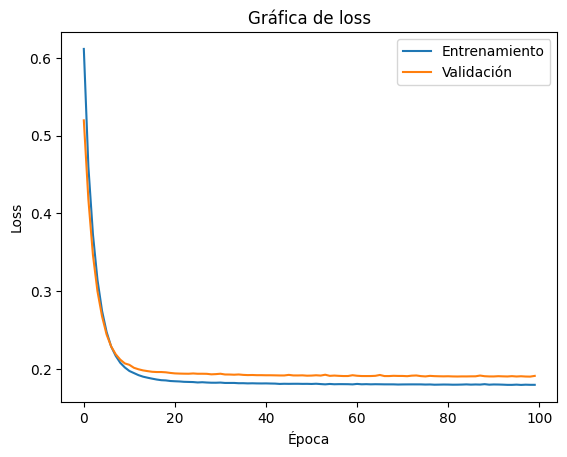

In [19]:
plt.title("Gráfica de loss")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["Entrenamiento", "Validación"], loc="upper right")

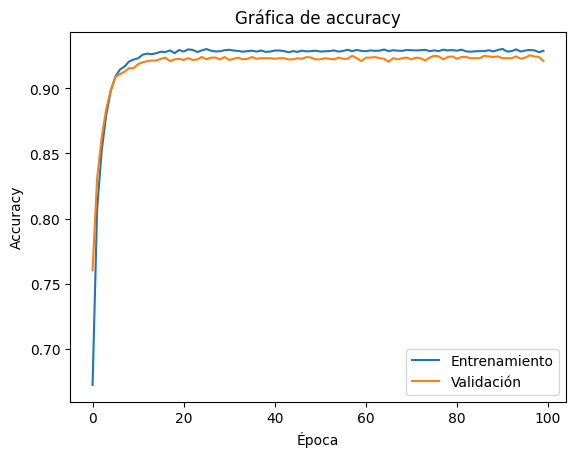

In [20]:
plt.title("Gráfica de accuracy")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["Entrenamiento", "Validación"], loc="lower right")

In [21]:
y_pred = model_sm.predict(x_eval)
y_pred = tf.round(y_pred)

matriz_confusion = confusion_matrix(y_eval, y_pred)
print(matriz_confusion)

70/70 [==============================] - 0s 1ms/step
[[ 867   89]
 [  86 1169]]


### **Evaluando asociación entre variables**

##### **Descubriendo asocición entre variables**

*   Usando coeficiente de contingencia, categóricos con categóricos

In [22]:
filas, columnas = x.shape
xa = x.T

from scipy.stats import chi2_contingency

coeficientes = []
for i in range(columnas):
    column = xa[i:i+1][0]
    nCat = len(np.unique(column))
    contingency_table, _, _ = np.histogram2d(column, y, bins=[nCat, 2])

    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    contingency_coefficient = np.sqrt(chi2 / (chi2 + np.sum(contingency_table)))
    coeficientes.append(contingency_coefficient)

# Imprimir las correlaciones
coef = np.array(coeficientes)
np.set_printoptions(precision=3)
to_delete = []
for i, coeficiente in enumerate(coeficientes):
    print(f"Atributo {i+1}: {coeficiente}")
    if(coeficiente <= 0.1): to_delete.append(i)

print(to_delete)

# 0 indica que no hay una asociación significativa entre las variables categóricas
# 1 indica que hay una fuerte asociación entre las variables

Atributo 1: 0.09355616501333629
Atributo 2: 0.07210369569839527
Atributo 3: 0.06754112040741456
Atributo 4: 0.05261959576794588
Atributo 5: 0.03830808106510966
Atributo 6: 0.32895102481156885
Atributo 7: 0.3551158617327055
Atributo 8: 0.6139020982338753
Atributo 9: 0.2200655967587761
Atributo 10: 4.538728751708926e-05
Atributo 11: 0.0361295236237102
Atributo 12: 0.03957603482340974
Atributo 13: 0.24544223176706928
Atributo 14: 0.5920491604154382
Atributo 15: 0.24607580056464806
Atributo 16: 0.21626492794210603
Atributo 17: 0.018010203880061013
Atributo 18: 0.06012181889236555
Atributo 19: 0.019824909581342014
Atributo 20: 0.04152135182297405
Atributo 21: 0.012203777970828977
Atributo 22: 0.0
Atributo 23: 0.0030777815064590677
Atributo 24: 0.12043101605744677
Atributo 25: 0.07530668574634693
Atributo 26: 0.3662076032954052
Atributo 27: 0.10387191977584892
Atributo 28: 0.127634925329432
Atributo 29: 0.07733973099841855
Atributo 30: 0.07934354641445956
[0, 1, 2, 3, 4, 9, 10, 11, 16, 17, 1

##### **Elaboración de modelo sin datos algo asociados**

In [23]:
xaux = np.delete(x, to_delete, axis=1)

xxd_train, xxd_eval, yxd_train, yxd_eval = train_test_split(xaux, y, test_size=0.2, random_state=42)

model_xd = Sequential([
    Dense(4, input_dim=len(xaux[0]), activation='relu'),
    Dense(2, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_xd.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

history = model_xd.fit(xxd_train, yxd_train, validation_data=(xxd_eval, yxd_eval), epochs=100, batch_size=128)

Epoch 1/100
70/70 [==============================] - 1s 5ms/step - loss: 0.6685 - accuracy: 0.4850 - val_loss: 0.6322 - val_accuracy: 0.7580
Epoch 2/100
70/70 [==============================] - 0s 2ms/step - loss: 0.5921 - accuracy: 0.8207 - val_loss: 0.5552 - val_accuracy: 0.8431
Epoch 3/100
70/70 [==============================] - 0s 2ms/step - loss: 0.5203 - accuracy: 0.8693 - val_loss: 0.4926 - val_accuracy: 0.8829
Epoch 4/100
70/70 [==============================] - 0s 3ms/step - loss: 0.4596 - accuracy: 0.8915 - val_loss: 0.4312 - val_accuracy: 0.9046
Epoch 5/100
70/70 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.9056 - val_loss: 0.3616 - val_accuracy: 0.9127
Epoch 6/100
70/70 [==============================] - 0s 3ms/step - loss: 0.3277 - accuracy: 0.9140 - val_loss: 0.2984 - val_accuracy: 0.9132
Epoch 7/100
70/70 [==============================] - 0s 3ms/step - loss: 0.2773 - accuracy: 0.9193 - val_loss: 0.2591 - val_accuracy: 0.9154
Epoch 8/100
7

##### **Evaluación de modelo sin datos algo asociados**

In [24]:
_, accuracy = model_xd.evaluate(xxd_eval, yxd_eval)
print("Accuracy: {:.2f}%".format(accuracy * 100))

70/70 [==============================] - 0s 1ms/step - loss: 0.1921 - accuracy: 0.9263
Accuracy: 92.63%


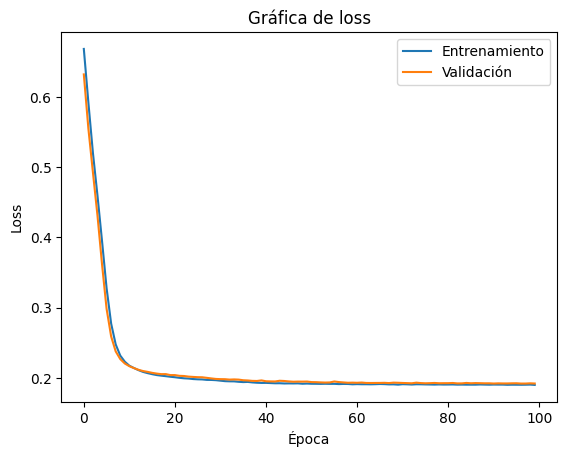

In [25]:
plt.title("Gráfica de loss")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["Entrenamiento", "Validación"], loc="upper right")

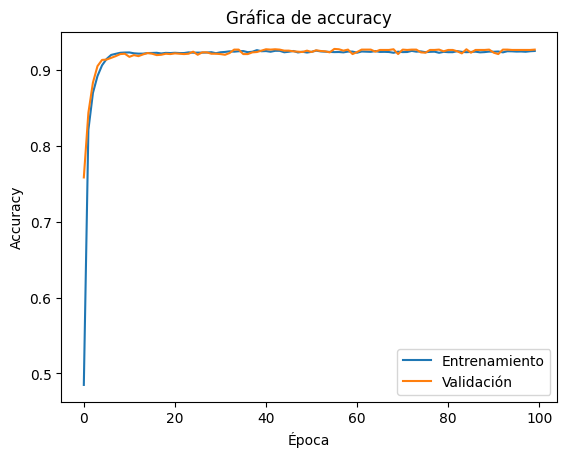

In [26]:
plt.title("Gráfica de accuracy")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["Entrenamiento", "Validación"], loc="lower right")